In [4]:

import os
#os.environ["CUDA_VISIBLE_DEVICES"]="6261507"

In [1]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.mlp import *
from alpdesign.utils import *
import jax 
from jax_unirep import get_reps
import haiku as hk

In [2]:
def hamming(seq1, seq2): # seq1 and seq2 are of same length
    seqlist1 = list(seq1)
    seqlist2 = list(seq2)
    hamming_distance = 0.
    for i in range(len(seqlist1)):
        if seqlist1[i] == seqlist2[i]:
            continue
        hamming_distance += 1.
    return hamming_distance / len(seqlist1)
    

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot(losses)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

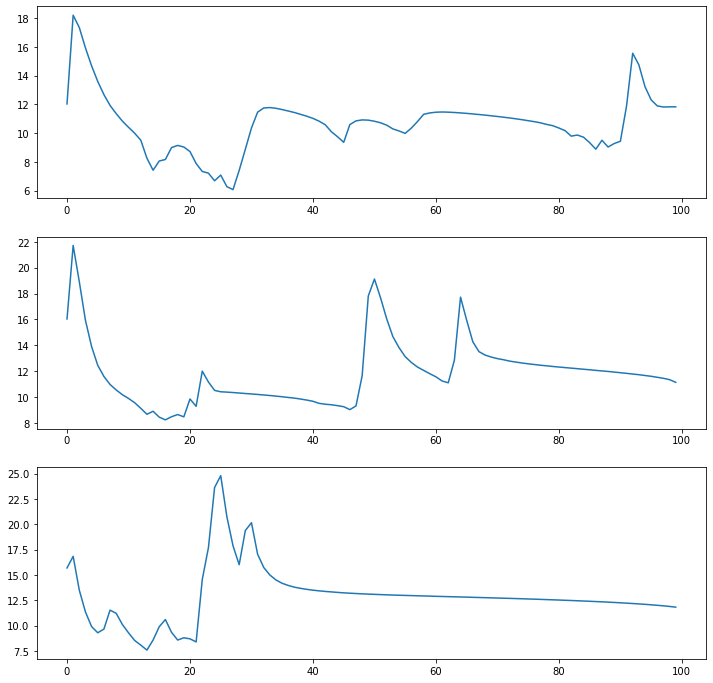

In [4]:
key = jax.random.PRNGKey(0)
batch_size = 16
bag_num = 6
target_seq = 'GIGAVLKVLTTGLPALISWIKRKRQQ'
oh_vec = encode_seq(list(target_seq))
seqs = ['GIGAVLKVLKAGLPALIVTLKRKIVQ',
       'PPGATLKKHTTGSVALISWIWARIQQ',
       'GIGAVLKVLTTGLKTLISAAKRKRAA',
       'HAPPVLKVLTTGLAPPLVWIKRKRTH',
       'GIGAVLUIHKLSSVAAWRPPKRKRQQ']


plt.rcParams["figure.figsize"] = (12,12)
fig, axs = plt.subplots(3)

#@jax.jit
def single_loop(key, seqs):

    # get labels
    labels = []
    for seq in seqs:
        labels.append(hamming(target_seq, seq))
    labels = jnp.array(labels)
    reps = get_reps(seqs)[0]
    key, _ = jax.random.split(key, num=2)
    forward = hk.without_apply_rng(hk.transform(alp.model_forward))
    params, mlp_loss = alp.ensemble_train(key, forward, reps, labels)
    #axs[i].plot(mlp_loss)
    final_vec = alp.bayes_opt(forward, params, labels)[0]
    
    # need to adjust length in the future
    logits = jax.random.normal(key, shape=(jnp.shape(oh_vec)))
    b_logits = jax.random.normal(key, shape=(batch_size,*jnp.shape(oh_vec)))
    params = forward_seqprop.init(key, logits)
    #loss_traces, loss, _seqs = pso_train(key, final_vec, b_logits, params, alp.seq.train_seqprop, batch_size, bag_num)
    loss_traces, loss, _seqs = pso_train(key, final_vec, b_logits, params, batch_size, bag_num)
    gen_seqs = []
    for seq in _seqs:
        seq = alp.utils.decode_seq(seq)
        str = ""
        gen_seqs.append(str.join(seq))
    # add data points
    seqs = [*seqs, *gen_seqs]
    return seqs, mlp_loss, loss_traces

loop_mlp_loss = []
loop_loss_traces = []
for i in range(3):
    key, _ = jax.random.split(key, num=2)
    seqs, mlp_loss, loss_traces = single_loop(key, seqs)
    loop_mlp_loss.append(mlp_loss)
    loop_loss_traces.append(loss_traces)
    axs[i].plot(mlp_loss)

In [16]:
print(seqs)
labels = []
for seq in seqs:
    labels.append(hamming(target_seq, seq))
print(labels)

['GIGAVLKVLKAGLPALIVTLKRKIVQ', 'PPGATLKKHTTGSVALISWIWARIQQ', 'GIGAVLKVLTTGLKTLISAAKRKRAA', 'HAPPVLKVLTTGLAPPLVWIKRKRTH', 'GIGAVLUIHKLSSVAAWRPPKRKRQQ', 'IKIGDEIKMGEFVGLFWWWSWWEKEW', 'IKIGDEIKRGEWVLLFGWGSWEEKWW', 'IKIGDYLKPGDWVCMFWWGSWFEKYW', 'IKIGDEIKPGDKSLIFGWSWSMWKEW', 'IAKKIGLKEGDKVFMFFGSWEQWYEW', 'IKIGHELKPGDFVFFTMGSGSMKKEW', 'IEIGHELKPGDKVFMFGWFWSEEEKW', 'IMIGEELKPGDWVGFFGWWSWEEKYW', 'RANPNAANPNRRGGCWQCIIIIIIIL', 'PNPCRGPWVIIIIIIYGGCPNCPPPG', 'RANPNPANPNRRGWCVSCIIIIIITP', 'GPNPANRNPWRCIIIIILLLIFPGCP', 'PNPRRNPIVIIIIIIYFGCPNCDPCP', 'GQNPPNRNCWRCIIIIILFFFPPGCG', 'PNNPNCTNGKRYWCCVLIIIFFCCPP', 'RANPVPPNGNPRGGCIKCIIIIIIIP', 'PAPNPNNRRFILLLMIPICGDCPPPI', 'PAPNPNGRRFNLLLIIIICPYCCIPV', 'PAPNGYRAIIIMLLMGGNCGNCPCCC', 'RAPQNPNCGHCRPIRIIIIIFLIPIP', 'CAPQNNQCPHCPPIRIIIIIILIFTP', 'PAPNPWKPPIILLMMGGGCPNCPGPP', 'PTPMQLRFFIIIIMGGNGCGNCPPPN', 'CPPQPNGNCGRPIICIIIIFFIIGCP']
[0.2692307692307692, 0.4230769230769231, 0.23076923076923078, 0.4230769230769231, 0.5, 0.9615384615384616, 1.0, 1.0, 1.0, 1.0, 0.

In [9]:
loop_loss_traces = jnp.array(loop_loss_traces)
loop_loss_traces.shape

(3, 8, 600)

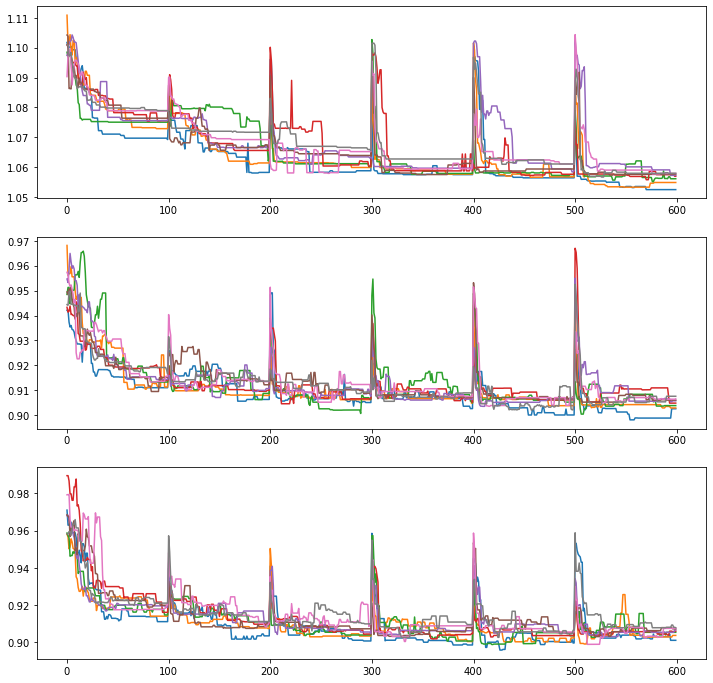

In [12]:
fig, axs = plt.subplots(3)
for i in range(3):
    for j in range(8):
        axs[i].plot(loop_loss_traces[i,j,:])
plt.savefig('./seq_loss.png', dpi=800)